# Ridge Regression vs DNN for Real Estate Price Prediction

M. Nurkan İlbahar                                                                            10/09/2022


Real estate.csv    https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Real estate.csv')

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
#'No' column drop
data.drop('No', axis = 1, inplace = True)

In [7]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
import seaborn as sns

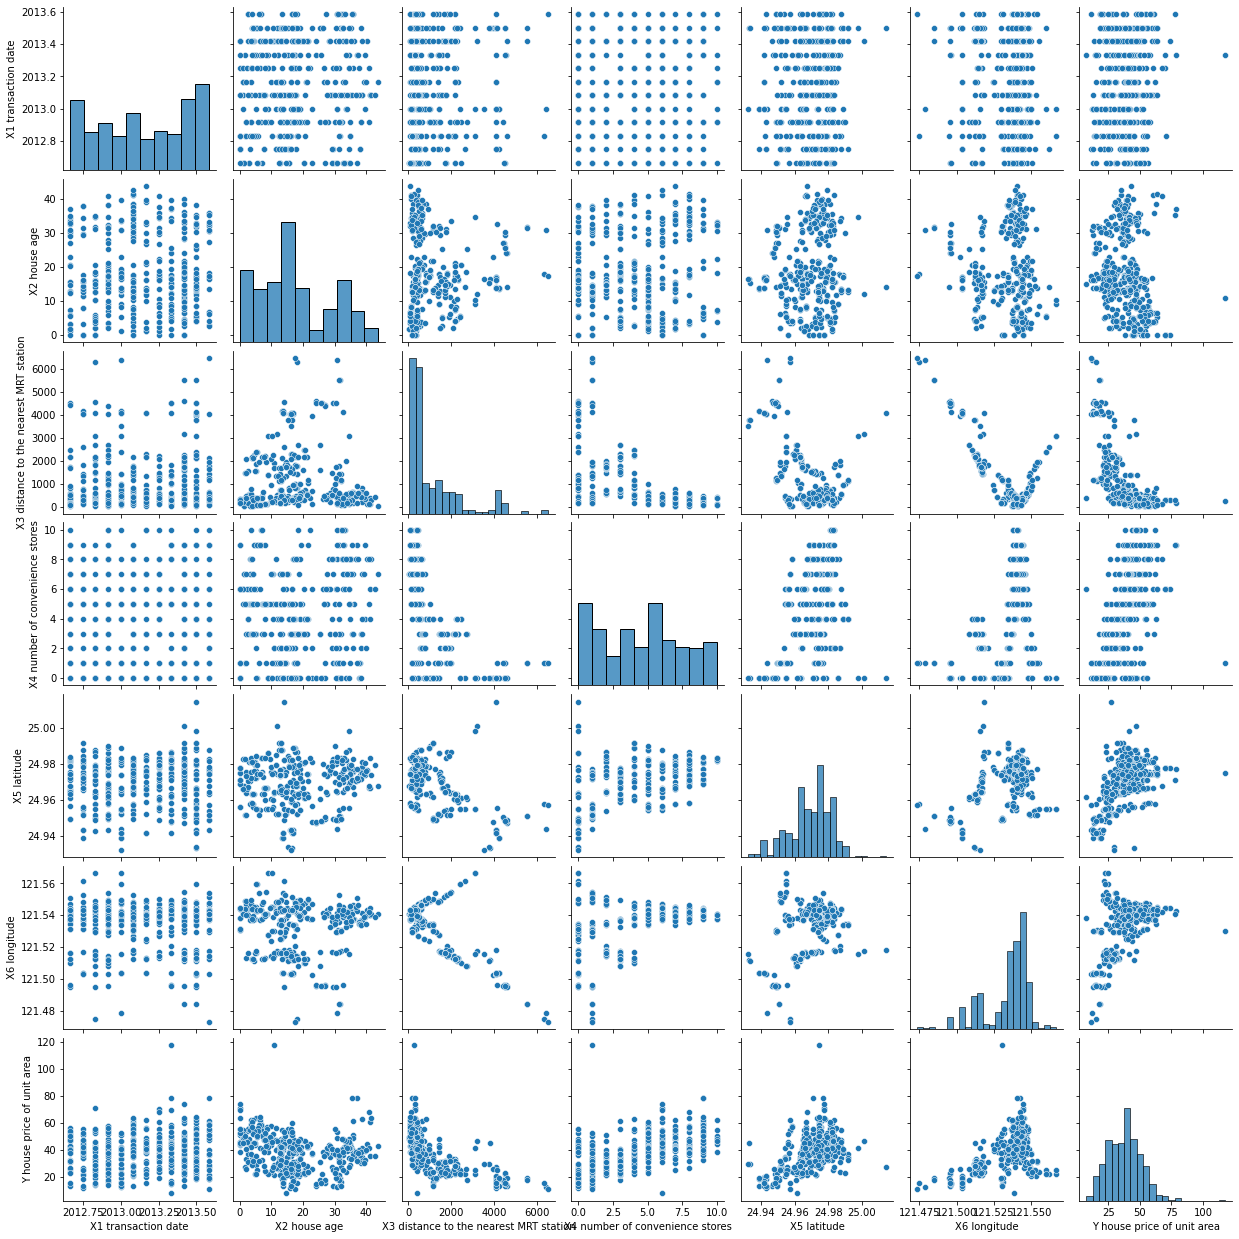

In [9]:
sns.pairplot(data)

In [10]:
corr=data.corr()

<AxesSubplot:>

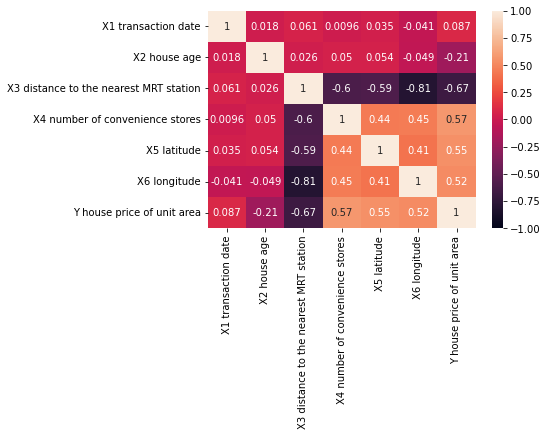

In [11]:
sns.heatmap(data.corr(), xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1,vmax=1, annot=True)

In [12]:
# almost no relation between'X1 transaction date' and 'Y house price of unit area' 
data.drop('X1 transaction date', axis = 1, inplace = True)
data.head()


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


# Linear Regression, Ridge Regression, Deep Neural Network


In [13]:
X=data.drop('Y house price of unit area', axis=1)
y=data['Y house price of unit area']

In [14]:
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [15]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)


    1) LINEAR REGRESSION

In [17]:
from sklearn.linear_model import LinearRegression



In [18]:

X_trainv, X_valid, y_trainv, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=6)

In [19]:
lm = LinearRegression()
lm.fit(X_trainv,y_trainv)


LinearRegression()

In [20]:
coeff_data = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_data

,Coefficient
X2 house age,-0.313760
X3 distance to the nearest MRT station,-0.004495
X4 number of convenience stores,1.077981
X5 latitude,284.618456
X6 longitude,-45.765530


In [21]:

lm.score(X_valid,y_valid)

0.6008543925031513

In [22]:
predictions = lm.predict(X_valid)
predictions

array([30.44112537, 30.02283442, 39.2749614 , 38.05558256,  9.46507234,
       39.78323823, 34.60656392, 44.72870659, 12.93865983, 29.92870654,
       40.81200203, 32.78340137, 35.8873244 , 48.17174105, 32.53233892,
       35.21142051, 43.47367475, 45.71530681, 52.05469324, 50.67305996,
       44.90755662, 35.15708788, 38.88343342, 47.86594867, 47.09551442,
       45.03306045, 41.45265347, 41.38990156, 38.92380057, 31.87583625,
       44.58215684, 54.48572339, 45.97955257, 32.04853897, 33.32304364,
       33.5386291 , 53.31467022, 43.87414059, 47.71542201, 34.19577595,
       41.43541822, 21.83256152, 45.82267278, 40.18133619, 43.88468124,
       32.88814526, 45.82267278, 37.10575316, 35.18846384, 44.51730104,
       39.92881255, 47.60508999, 43.73290208, 32.47239392, 47.60508999,
       34.56242439, 37.60607308, 47.86084036, 52.21157304, 13.26940723,
       43.47367475, 29.25341345, 14.5258456 , 45.28338386, 41.72078534,
       13.30078318, 43.90134986])

In [23]:
np.array(y_valid)

array([37. , 22.8, 43.9, 67.7, 11.2, 37.5, 27.3, 39.3, 29.3, 25.6, 35.6,
       27.3, 37.4, 52.2, 27. , 50.5, 55.3, 49.3, 58. , 71. , 56.8, 31.3,
       40.6, 51.6, 54.8, 51.6, 40.5, 42.3, 63.3, 22.9, 48.2, 54.4, 42.1,
       28.8, 30.8, 20.9, 44.7, 40.3, 57.8, 34.1, 28.5, 20.7, 53. , 42.5,
       37.7, 26.9, 51. , 36.8, 33.4, 42.5, 28.9, 48.6, 43.7, 27. , 45.1,
       40.8, 34.6, 47.1, 53.5, 19.2, 55.2, 30.1, 15.4, 44. , 39.4, 18.6,
       40.2])

In [24]:
comp=pd.DataFrame({'Actual':y_valid, 'Predicted':predictions})
comp['residuals'] = comp['Actual']-comp['Predicted']
comp

,Actual,Predicted,residuals
290,37.0,30.441125,6.558875
369,22.8,30.022834,-7.222834
257,43.9,39.274961,4.625039
389,67.7,38.055583,29.644417
347,11.2,9.465072,1.734928
...,...,...,...
409,15.4,14.525846,0.874154
278,44.0,45.283384,-1.283384
111,39.4,41.720785,-2.320785
320,18.6,13.300783,5.299217


<AxesSubplot:xlabel='residuals', ylabel='Count'>

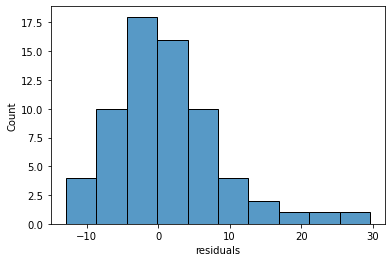

In [25]:
sns.histplot(comp['residuals'])

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, predictions)

66.05484754802981

In [27]:
mean_absolute_error(y_valid, predictions)

5.845061033554464

In [28]:
# 30 Fold cross validation for Linear Regression

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=30)
scores 

array([ 0.28741421,  0.87060587,  0.78312245,  0.85090107,  0.62697543,
        0.6961019 ,  0.43849501,  0.44034941,  0.61066545,  0.43305063,
        0.15349886,  0.76635681,  0.90170499,  0.57172038,  0.64056088,
        0.53690322,  0.59039648,  0.1530574 ,  0.4187964 ,  0.33160885,
        0.83832385,  0.50376904,  0.76693494,  0.68719405,  0.39196853,
        0.40394866,  0.46829756, -0.0449634 ,  0.77174755,  0.38585966])

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=30)
scores 

array([-164.04135568,  -20.77907248,  -38.23999302,  -29.84440532,
        -72.0950435 ,  -47.27222855,  -34.20326459,  -80.64407764,
        -26.42384606,  -44.55322409,  -74.80061844,  -49.44330252,
        -23.6496174 ,  -95.57834876,  -64.68098117,  -33.36355861,
        -49.98009236, -579.01363505,  -91.3391712 ,  -67.57235709,
        -31.82847586,  -62.12885408,  -42.84556278,  -45.53105174,
        -64.69374457, -107.34667942,  -53.96516062, -163.17353909,
        -33.01643416,  -32.59887399])

In [31]:
np.mean(scores)
# Mean scores

-77.48821899375963

    2) DEEP NEURAL NETWORK

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [8]:
#featureları normalization
mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

print(X_train.shape)

(331, 5)


In [17]:

mdl1 = keras.Sequential()

mdl1.add(layers.Dense(64, activation = "relu", input_shape = (X_train.shape[1],) ))
mdl1.add(layers.Dense(32, activation = "relu"))
mdl1.add(layers.Dense(1, activation = "linear"))

mdl1.compile(optimizer="adam", loss = "mse", metrics = ["mape"])
mdl1.fit(X_train, y_train, epochs=1000)

Epoch 1/1000


2022-10-03 00:43:20.484964: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11/11 [==============================] - 0s 776us/step - loss: 43323.6094 - mape: 514.0826
Epoch 2/1000
11/11 [==============================] - 0s 912us/step - loss: 5518.5537 - mape: 214.8776
Epoch 3/1000
11/11 [==============================] - 0s 834us/step - loss: 2854.4753 - mape: 139.0780
Epoch 4/1000
11/11 [==============================] - 0s 858us/step - loss: 1056.8585 - mape: 88.8625
Epoch 5/1000
11/11 [==============================] - 0s 795us/step - loss: 379.2489 - mape: 44.0971
Epoch 6/1000
11/11 [==============================] - 0s 845us/step - loss: 157.8944 - mape: 27.6232
Epoch 7/1000
11/11 [==============================] - 0s 884us/step - loss: 89.9329 - mape: 21.2907
Epoch 8/1000
11/11 [==============================] - 0s 785us/step - loss: 87.7802 - mape: 20.7196
Epoch 9/1000
11/11 [==============================] - 0s 799us/step - loss: 74.4033 - mape: 16.4559
Epoch 10/1000
11/11 [==============================] - 0s 783us/step - loss: 75.4460 - mape: 16.577

11/11 [==============================] - 0s 672us/step - loss: 70.7859 - mape: 17.4635
Epoch 163/1000
11/11 [==============================] - 0s 665us/step - loss: 65.1361 - mape: 15.5060
Epoch 164/1000
11/11 [==============================] - 0s 749us/step - loss: 64.5644 - mape: 15.6286
Epoch 165/1000
11/11 [==============================] - 0s 693us/step - loss: 62.9237 - mape: 15.2617
Epoch 166/1000
11/11 [==============================] - 0s 632us/step - loss: 62.5670 - mape: 14.8376
Epoch 167/1000
11/11 [==============================] - 0s 720us/step - loss: 64.8600 - mape: 15.8360
Epoch 168/1000
11/11 [==============================] - 0s 705us/step - loss: 63.0772 - mape: 14.6734
Epoch 169/1000
11/11 [==============================] - 0s 635us/step - loss: 66.0080 - mape: 15.5619
Epoch 170/1000
11/11 [==============================] - 0s 763us/step - loss: 73.3481 - mape: 17.4685
Epoch 171/1000
11/11 [==============================] - 0s 701us/step - loss: 69.5657 - mape: 17.

11/11 [==============================] - 0s 638us/step - loss: 62.3844 - mape: 16.0698
Epoch 323/1000
11/11 [==============================] - 0s 723us/step - loss: 62.2539 - mape: 16.3193
Epoch 324/1000
11/11 [==============================] - 0s 708us/step - loss: 58.8186 - mape: 15.3617
Epoch 325/1000
11/11 [==============================] - 0s 615us/step - loss: 60.6924 - mape: 15.8025
Epoch 326/1000
11/11 [==============================] - 0s 714us/step - loss: 60.7695 - mape: 15.4683
Epoch 327/1000
11/11 [==============================] - 0s 874us/step - loss: 57.2715 - mape: 14.3862
Epoch 328/1000
11/11 [==============================] - 0s 705us/step - loss: 66.0490 - mape: 17.0884
Epoch 329/1000
11/11 [==============================] - 0s 627us/step - loss: 73.2182 - mape: 19.1023
Epoch 330/1000
11/11 [==============================] - 0s 729us/step - loss: 150.3614 - mape: 29.7551
Epoch 331/1000
11/11 [==============================] - 0s 698us/step - loss: 94.1355 - mape: 23

11/11 [==============================] - 0s 622us/step - loss: 59.4057 - mape: 16.3730
Epoch 483/1000
11/11 [==============================] - 0s 781us/step - loss: 64.8185 - mape: 17.3538
Epoch 484/1000
11/11 [==============================] - 0s 682us/step - loss: 67.9935 - mape: 18.5732
Epoch 485/1000
11/11 [==============================] - 0s 634us/step - loss: 82.9158 - mape: 21.0839
Epoch 486/1000
11/11 [==============================] - 0s 713us/step - loss: 216.1955 - mape: 38.0490
Epoch 487/1000
11/11 [==============================] - 0s 732us/step - loss: 266.9828 - mape: 42.5613
Epoch 488/1000
11/11 [==============================] - 0s 655us/step - loss: 233.5790 - mape: 38.2310
Epoch 489/1000
11/11 [==============================] - 0s 716us/step - loss: 132.1445 - mape: 29.5665
Epoch 490/1000
11/11 [==============================] - 0s 699us/step - loss: 89.1822 - mape: 22.7149
Epoch 491/1000
11/11 [==============================] - 0s 627us/step - loss: 80.8823 - mape:

11/11 [==============================] - 0s 694us/step - loss: 63.7613 - mape: 17.3645
Epoch 643/1000
11/11 [==============================] - 0s 641us/step - loss: 54.1949 - mape: 14.7252
Epoch 644/1000
11/11 [==============================] - 0s 699us/step - loss: 58.4937 - mape: 15.4757
Epoch 645/1000
11/11 [==============================] - 0s 698us/step - loss: 57.7229 - mape: 16.2702
Epoch 646/1000
11/11 [==============================] - 0s 641us/step - loss: 61.1462 - mape: 16.0468
Epoch 647/1000
11/11 [==============================] - 0s 668us/step - loss: 60.2906 - mape: 17.0386
Epoch 648/1000
11/11 [==============================] - 0s 749us/step - loss: 61.9499 - mape: 16.8242
Epoch 649/1000
11/11 [==============================] - 0s 643us/step - loss: 70.8604 - mape: 20.0481
Epoch 650/1000
11/11 [==============================] - 0s 674us/step - loss: 58.8409 - mape: 16.2498
Epoch 651/1000
11/11 [==============================] - 0s 738us/step - loss: 57.6962 - mape: 14.

11/11 [==============================] - 0s 702us/step - loss: 58.8688 - mape: 15.6155
Epoch 803/1000
11/11 [==============================] - 0s 627us/step - loss: 59.3382 - mape: 17.2085
Epoch 804/1000
11/11 [==============================] - 0s 705us/step - loss: 55.9912 - mape: 15.5054
Epoch 805/1000
11/11 [==============================] - 0s 721us/step - loss: 59.5968 - mape: 16.4100
Epoch 806/1000
11/11 [==============================] - 0s 670us/step - loss: 53.6016 - mape: 15.1262
Epoch 807/1000
11/11 [==============================] - 0s 672us/step - loss: 56.4796 - mape: 15.9055
Epoch 808/1000
11/11 [==============================] - 0s 763us/step - loss: 59.5451 - mape: 16.8274
Epoch 809/1000
11/11 [==============================] - 0s 685us/step - loss: 58.0519 - mape: 15.9118
Epoch 810/1000
11/11 [==============================] - 0s 648us/step - loss: 58.9759 - mape: 16.5678
Epoch 811/1000
11/11 [==============================] - 0s 759us/step - loss: 54.1418 - mape: 15.

11/11 [==============================] - 0s 680us/step - loss: 111.2487 - mape: 27.2644
Epoch 963/1000
11/11 [==============================] - 0s 642us/step - loss: 71.5224 - mape: 19.7423
Epoch 964/1000
11/11 [==============================] - 0s 742us/step - loss: 53.1504 - mape: 15.0015
Epoch 965/1000
11/11 [==============================] - 0s 688us/step - loss: 56.4185 - mape: 15.2703
Epoch 966/1000
11/11 [==============================] - 0s 629us/step - loss: 54.5330 - mape: 15.3865
Epoch 967/1000
11/11 [==============================] - 0s 723us/step - loss: 57.4396 - mape: 15.5618
Epoch 968/1000
11/11 [==============================] - 0s 700us/step - loss: 57.8862 - mape: 16.2999
Epoch 969/1000
11/11 [==============================] - 0s 633us/step - loss: 67.1354 - mape: 18.3168
Epoch 970/1000
11/11 [==============================] - 0s 731us/step - loss: 65.9356 - mape: 18.3808
Epoch 971/1000
11/11 [==============================] - 0s 739us/step - loss: 75.1726 - mape: 21

In [33]:
mdl1.evaluate(X_train, y_train)

11/11 [==============================] - 0s 574us/step - loss: 38.7391 - mape: 9.6384


[38.73914337158203, 9.63835334777832]

In [9]:

mdl2 = keras.Sequential()

mdl2.add(layers.Dense(64, activation = "relu", input_shape = (X_train.shape[1],) ))
mdl2.add(layers.Dense(32, activation = "relu"))
mdl2.add(layers.Dense(1, activation = "linear"))


early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=30)
save_best = keras.callbacks.ModelCheckpoint("best_mdl.keras",monitor="val_loss", save_best_only=True)

mdl2.compile(optimizer="adam", loss = "mse", metrics = ["mape"])
history = mdl2.fit(X_train, y_train, epochs=1000, validation_split=0.1, callbacks=[save_best])

Epoch 1/1000


2022-10-03 23:14:28.291566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


10/10 [==============================] - 0s 13ms/step - loss: 1615.7839 - mape: 100.0053 - val_loss: 1813.0837 - val_mape: 99.3911
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 1590.6971 - mape: 98.9558 - val_loss: 1784.8914 - val_mape: 98.5217
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 1563.7875 - mape: 97.8148 - val_loss: 1751.3950 - val_mape: 97.4918
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 1531.6973 - mape: 96.4799 - val_loss: 1708.5089 - val_mape: 96.1916
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 1490.0458 - mape: 94.7723 - val_loss: 1650.0300 - val_mape: 94.4313
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 1431.6034 - mape: 92.4916 - val_loss: 1570.4808 - val_mape: 91.9980
Epoch 7/1000
10/10 [==============================] - 0s 4ms/step - loss: 1356.0415 - mape: 89.3865 - val_loss: 1465.6293 - val_mape: 88.7142
Epoch 8/1000
10/1

Epoch 118/1000
10/10 [==============================] - 0s 4ms/step - loss: 56.2108 - mape: 13.0777 - val_loss: 39.7907 - val_mape: 12.3898
Epoch 119/1000
10/10 [==============================] - 0s 2ms/step - loss: 55.7262 - mape: 12.9280 - val_loss: 40.5893 - val_mape: 12.2713
Epoch 120/1000
10/10 [==============================] - 0s 2ms/step - loss: 55.8558 - mape: 12.8487 - val_loss: 40.6822 - val_mape: 12.3539
Epoch 121/1000
10/10 [==============================] - 0s 2ms/step - loss: 55.7536 - mape: 12.9039 - val_loss: 40.0537 - val_mape: 12.3585
Epoch 122/1000
10/10 [==============================] - 0s 4ms/step - loss: 55.8593 - mape: 13.0350 - val_loss: 39.2466 - val_mape: 12.3238
Epoch 123/1000
10/10 [==============================] - 0s 2ms/step - loss: 55.8445 - mape: 13.1416 - val_loss: 39.6173 - val_mape: 12.2595
Epoch 124/1000
10/10 [==============================] - 0s 2ms/step - loss: 55.5491 - mape: 13.0111 - val_loss: 40.5539 - val_mape: 12.4192
Epoch 125/1000
10/10

10/10 [==============================] - 0s 2ms/step - loss: 52.3254 - mape: 12.0002 - val_loss: 36.9110 - val_mape: 11.5168
Epoch 235/1000
10/10 [==============================] - 0s 2ms/step - loss: 52.1539 - mape: 11.9365 - val_loss: 37.8049 - val_mape: 11.6167
Epoch 236/1000
10/10 [==============================] - 0s 2ms/step - loss: 52.1004 - mape: 11.8556 - val_loss: 37.1694 - val_mape: 11.5368
Epoch 237/1000
10/10 [==============================] - 0s 2ms/step - loss: 52.0166 - mape: 11.9035 - val_loss: 36.5480 - val_mape: 11.2839
Epoch 238/1000
10/10 [==============================] - 0s 2ms/step - loss: 52.0018 - mape: 11.9108 - val_loss: 36.9853 - val_mape: 11.2716
Epoch 239/1000
10/10 [==============================] - 0s 2ms/step - loss: 52.0158 - mape: 11.9317 - val_loss: 36.7847 - val_mape: 11.3608
Epoch 240/1000
10/10 [==============================] - 0s 2ms/step - loss: 51.9335 - mape: 11.8611 - val_loss: 36.8696 - val_mape: 11.5669
Epoch 241/1000
10/10 [=============

10/10 [==============================] - 0s 3ms/step - loss: 48.7107 - mape: 11.2977 - val_loss: 37.0169 - val_mape: 11.0370
Epoch 351/1000
10/10 [==============================] - 0s 2ms/step - loss: 48.8995 - mape: 11.2262 - val_loss: 36.3524 - val_mape: 10.9953
Epoch 352/1000
10/10 [==============================] - 0s 2ms/step - loss: 48.9202 - mape: 11.1726 - val_loss: 36.3238 - val_mape: 10.8307
Epoch 353/1000
10/10 [==============================] - 0s 2ms/step - loss: 48.7504 - mape: 11.1871 - val_loss: 35.0678 - val_mape: 10.7768
Epoch 354/1000
10/10 [==============================] - 0s 2ms/step - loss: 48.9449 - mape: 11.3391 - val_loss: 35.4222 - val_mape: 10.9793
Epoch 355/1000
10/10 [==============================] - 0s 2ms/step - loss: 49.0398 - mape: 11.0633 - val_loss: 36.9511 - val_mape: 10.8117
Epoch 356/1000
10/10 [==============================] - 0s 2ms/step - loss: 48.8127 - mape: 11.0626 - val_loss: 35.7258 - val_mape: 10.7587
Epoch 357/1000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 46.6327 - mape: 10.5864 - val_loss: 36.4214 - val_mape: 10.4433
Epoch 467/1000
10/10 [==============================] - 0s 2ms/step - loss: 46.4253 - mape: 10.6635 - val_loss: 34.5803 - val_mape: 10.7542
Epoch 468/1000
10/10 [==============================] - 0s 2ms/step - loss: 47.7091 - mape: 11.1285 - val_loss: 35.1892 - val_mape: 10.7781
Epoch 469/1000
10/10 [==============================] - 0s 2ms/step - loss: 46.7020 - mape: 10.7536 - val_loss: 36.9196 - val_mape: 10.9785
Epoch 470/1000
10/10 [==============================] - 0s 2ms/step - loss: 46.3784 - mape: 10.7009 - val_loss: 35.3124 - val_mape: 10.8013
Epoch 471/1000
10/10 [==============================] - 0s 2ms/step - loss: 46.3477 - mape: 10.6826 - val_loss: 34.9765 - val_mape: 10.5833
Epoch 472/1000
10/10 [==============================] - 0s 2ms/step - loss: 46.4534 - mape: 10.6970 - val_loss: 35.4335 - val_mape: 10.7375
Epoch 473/1000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 44.8075 - mape: 10.2468 - val_loss: 34.3610 - val_mape: 10.8410
Epoch 583/1000
10/10 [==============================] - 0s 2ms/step - loss: 44.7969 - mape: 10.2452 - val_loss: 34.7294 - val_mape: 10.7932
Epoch 584/1000
10/10 [==============================] - 0s 2ms/step - loss: 45.0258 - mape: 10.1843 - val_loss: 35.7603 - val_mape: 10.9835
Epoch 585/1000
10/10 [==============================] - 0s 2ms/step - loss: 45.3563 - mape: 10.5381 - val_loss: 33.3776 - val_mape: 11.0847
Epoch 586/1000
10/10 [==============================] - 0s 2ms/step - loss: 44.7627 - mape: 10.3218 - val_loss: 34.9459 - val_mape: 10.6365
Epoch 587/1000
10/10 [==============================] - 0s 2ms/step - loss: 44.9036 - mape: 10.2439 - val_loss: 35.8242 - val_mape: 10.8156
Epoch 588/1000
10/10 [==============================] - 0s 2ms/step - loss: 44.6277 - mape: 10.2288 - val_loss: 36.3552 - val_mape: 10.8114
Epoch 589/1000
10/10 [=============

10/10 [==============================] - 0s 3ms/step - loss: 43.8338 - mape: 10.0326 - val_loss: 35.9939 - val_mape: 10.8902
Epoch 699/1000
10/10 [==============================] - 0s 2ms/step - loss: 44.0922 - mape: 10.0782 - val_loss: 34.3643 - val_mape: 11.1529
Epoch 700/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.8585 - mape: 10.0368 - val_loss: 35.0120 - val_mape: 10.9738
Epoch 701/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.6986 - mape: 10.1475 - val_loss: 34.6581 - val_mape: 10.8762
Epoch 702/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.6682 - mape: 10.0913 - val_loss: 34.9273 - val_mape: 11.0209
Epoch 703/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.6938 - mape: 10.0089 - val_loss: 35.3130 - val_mape: 10.7158
Epoch 704/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.5724 - mape: 9.9855 - val_loss: 35.2866 - val_mape: 11.0824
Epoch 705/1000
10/10 [==============

Epoch 757/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.1449 - mape: 9.9227 - val_loss: 33.8260 - val_mape: 11.0583
Epoch 758/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.1207 - mape: 10.1312 - val_loss: 34.8969 - val_mape: 10.6603
Epoch 759/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.4515 - mape: 10.0843 - val_loss: 36.3956 - val_mape: 10.7793
Epoch 760/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.1481 - mape: 9.8972 - val_loss: 35.2583 - val_mape: 11.2959
Epoch 761/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.4989 - mape: 10.1248 - val_loss: 34.4302 - val_mape: 11.1991
Epoch 762/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.4338 - mape: 9.8981 - val_loss: 35.6571 - val_mape: 10.8024
Epoch 763/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.6114 - mape: 10.0214 - val_loss: 34.6754 - val_mape: 11.1174
Epoch 764/1000
10/10 [=

Epoch 816/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.0384 - mape: 9.8219 - val_loss: 35.1768 - val_mape: 11.1065
Epoch 817/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.7902 - mape: 9.8367 - val_loss: 34.5788 - val_mape: 11.0039
Epoch 818/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.6811 - mape: 9.8916 - val_loss: 34.8610 - val_mape: 11.0430
Epoch 819/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.9920 - mape: 9.9860 - val_loss: 34.8859 - val_mape: 11.0066
Epoch 820/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.7115 - mape: 9.8176 - val_loss: 35.3923 - val_mape: 10.9064
Epoch 821/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.8362 - mape: 9.8021 - val_loss: 34.7401 - val_mape: 11.0250
Epoch 822/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.8509 - mape: 9.8317 - val_loss: 34.0089 - val_mape: 10.8334
Epoch 823/1000
10/10 [=====

Epoch 875/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.9437 - mape: 10.0401 - val_loss: 37.7089 - val_mape: 11.0173
Epoch 876/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.6355 - mape: 9.8228 - val_loss: 36.0016 - val_mape: 11.0308
Epoch 877/1000
10/10 [==============================] - 0s 2ms/step - loss: 44.3248 - mape: 10.4970 - val_loss: 32.9182 - val_mape: 11.4289
Epoch 878/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.2649 - mape: 10.0901 - val_loss: 36.7860 - val_mape: 10.9675
Epoch 879/1000
10/10 [==============================] - 0s 2ms/step - loss: 43.1709 - mape: 9.8196 - val_loss: 33.7391 - val_mape: 10.8117
Epoch 880/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.6426 - mape: 10.0042 - val_loss: 34.1966 - val_mape: 11.0201
Epoch 881/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.3902 - mape: 9.9508 - val_loss: 34.8794 - val_mape: 11.0236
Epoch 882/1000
10/10 [=

Epoch 934/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.9668 - mape: 9.7337 - val_loss: 35.4866 - val_mape: 11.0288
Epoch 935/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.8609 - mape: 9.6603 - val_loss: 35.3333 - val_mape: 11.0578
Epoch 936/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.4941 - mape: 9.9120 - val_loss: 34.4501 - val_mape: 11.2813
Epoch 937/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.8257 - mape: 9.8324 - val_loss: 35.3679 - val_mape: 10.8439
Epoch 938/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.9873 - mape: 9.6565 - val_loss: 35.2479 - val_mape: 10.8881
Epoch 939/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.1064 - mape: 9.8178 - val_loss: 34.7421 - val_mape: 11.0114
Epoch 940/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.8642 - mape: 9.6855 - val_loss: 35.5594 - val_mape: 10.8309
Epoch 941/1000
10/10 [=====

Epoch 993/1000
10/10 [==============================] - 0s 2ms/step - loss: 42.1141 - mape: 9.8202 - val_loss: 35.3391 - val_mape: 11.3275
Epoch 994/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.2636 - mape: 9.5803 - val_loss: 36.6619 - val_mape: 10.7940
Epoch 995/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.7420 - mape: 9.5897 - val_loss: 34.0046 - val_mape: 10.9977
Epoch 996/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.5320 - mape: 9.6944 - val_loss: 34.6272 - val_mape: 10.8782
Epoch 997/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.5673 - mape: 9.7660 - val_loss: 35.2730 - val_mape: 10.9889
Epoch 998/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.3130 - mape: 9.6102 - val_loss: 35.6341 - val_mape: 10.9036
Epoch 999/1000
10/10 [==============================] - 0s 2ms/step - loss: 41.1557 - mape: 9.5936 - val_loss: 34.7940 - val_mape: 11.1100
Epoch 1000/1000
10/10 [====

In [10]:
mdl2.evaluate(X_train, y_train)

11/11 [==============================] - 0s 788us/step - loss: 40.4800 - mape: 9.8494


[40.48002624511719, 9.849393844604492]

(0.0, 20.0)

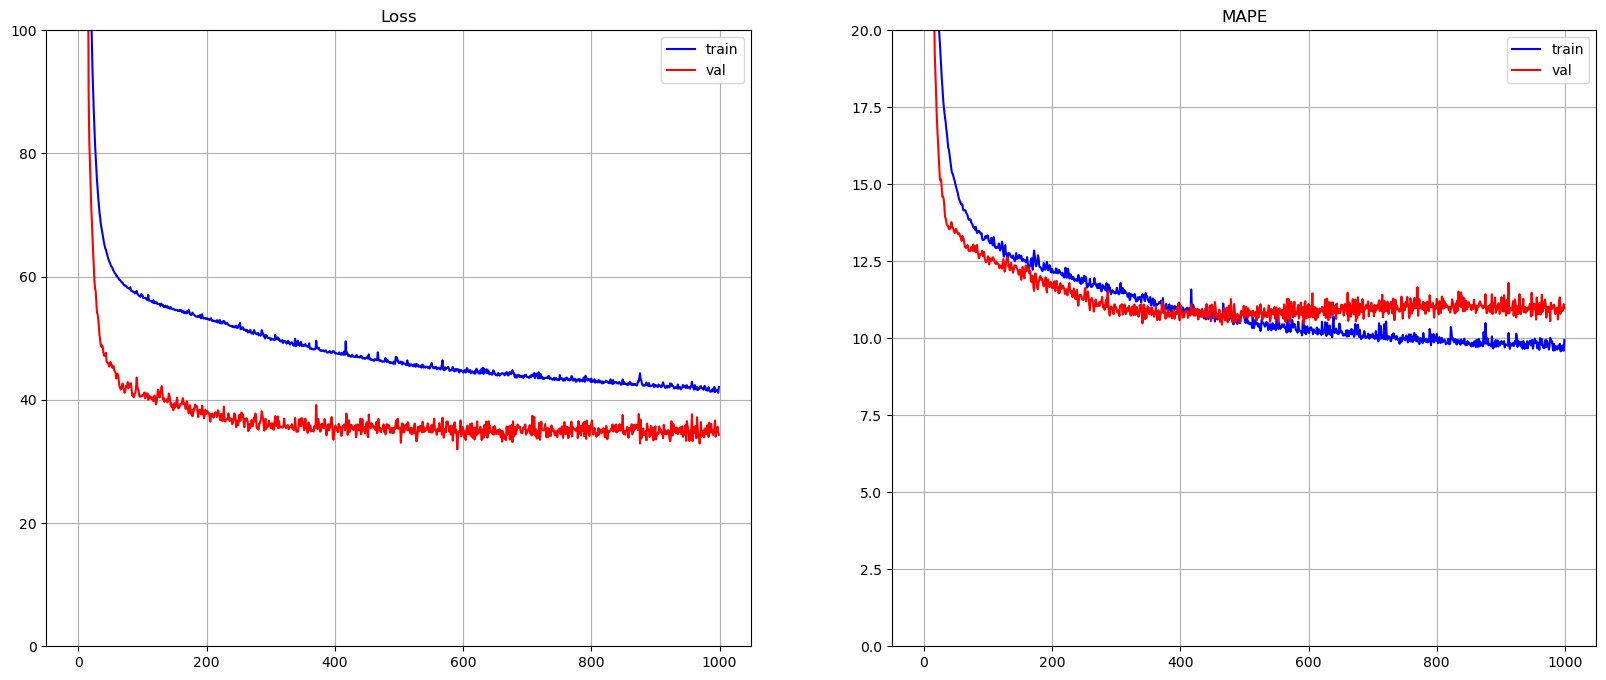

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

plt.plot(history.history["loss"], "-b", label = "train")
plt.plot(history.history["val_loss"], "-r", label = "val")
plt.grid()
plt.legend()
plt.title("Loss")
plt.ylim([0,100])

plt.subplot(1,2,2)

plt.plot(history.history["mape"], "-b", label = "train")
plt.plot(history.history["val_mape"], "-r", label = "val")
plt.grid()
plt.legend()
plt.title("MAPE")
plt.ylim([0,20])

In [43]:
mdl3 = keras.Sequential()

mdl3.add(layers.Dense(64, activation = "relu", input_shape = (X_train.shape[1],) ))
mdl3.add(layers.Dense(32, activation = "relu"))
mdl3.add(layers.Dense(1, activation = "linear"))


early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
save_best = keras.callbacks.ModelCheckpoint("best_mdl.keras",monitor="val_loss", save_best_only=True)

mdl3.compile(optimizer="adam", loss = "mse", metrics = ["mape"])
history = mdl3.fit(X_train, y_train, epochs=2000, validation_split=0.1, callbacks=[save_best])

Epoch 1/2000
10/10 [==============================] - 0s 10ms/step - loss: 1605.9568 - mape: 99.2431 - val_loss: 1803.6195 - val_mape: 98.9219
Epoch 2/2000
10/10 [==============================] - 0s 4ms/step - loss: 1574.3000 - mape: 97.9788 - val_loss: 1765.9974 - val_mape: 97.7764
Epoch 3/2000
10/10 [==============================] - 0s 4ms/step - loss: 1537.3781 - mape: 96.4127 - val_loss: 1719.8241 - val_mape: 96.3491
Epoch 4/2000
10/10 [==============================] - 0s 4ms/step - loss: 1490.6598 - mape: 94.3899 - val_loss: 1659.3677 - val_mape: 94.4375
Epoch 5/2000
10/10 [==============================] - 0s 4ms/step - loss: 1429.8464 - mape: 91.6939 - val_loss: 1580.0599 - val_mape: 91.8964
Epoch 6/2000
10/10 [==============================] - 0s 4ms/step - loss: 1350.0594 - mape: 88.2237 - val_loss: 1476.2351 - val_mape: 88.5595
Epoch 7/2000
10/10 [==============================] - 0s 4ms/step - loss: 1251.2426 - mape: 83.9314 - val_loss: 1345.0413 - val_mape: 84.2511
Epoch

Epoch 118/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.7987 - mape: 12.7607 - val_loss: 41.6361 - val_mape: 12.9762
Epoch 119/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.7626 - mape: 12.8058 - val_loss: 41.1639 - val_mape: 12.9577
Epoch 120/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.7304 - mape: 12.8784 - val_loss: 40.7687 - val_mape: 12.9111
Epoch 121/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.5846 - mape: 12.9016 - val_loss: 41.0034 - val_mape: 12.9652
Epoch 122/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.7123 - mape: 12.9023 - val_loss: 41.0569 - val_mape: 12.9897
Epoch 123/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.5994 - mape: 12.9238 - val_loss: 40.8405 - val_mape: 12.8908
Epoch 124/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.6003 - mape: 12.8472 - val_loss: 41.2792 - val_mape: 12.9901
Epoch 125/2000
10/10

10/10 [==============================] - 0s 2ms/step - loss: 53.7769 - mape: 12.1690 - val_loss: 39.9802 - val_mape: 12.3873
Epoch 235/2000
10/10 [==============================] - 0s 2ms/step - loss: 53.6428 - mape: 12.0212 - val_loss: 39.1292 - val_mape: 12.2563
Epoch 236/2000
10/10 [==============================] - 0s 2ms/step - loss: 53.3041 - mape: 12.0651 - val_loss: 38.6902 - val_mape: 12.2433
Epoch 237/2000
10/10 [==============================] - 0s 2ms/step - loss: 53.4974 - mape: 12.1029 - val_loss: 38.7270 - val_mape: 12.2370
Epoch 238/2000
10/10 [==============================] - 0s 2ms/step - loss: 53.3960 - mape: 12.0629 - val_loss: 39.1136 - val_mape: 12.2180
Epoch 239/2000
10/10 [==============================] - 0s 2ms/step - loss: 53.4912 - mape: 12.0689 - val_loss: 39.0255 - val_mape: 12.2587
Epoch 240/2000
10/10 [==============================] - 0s 2ms/step - loss: 53.3583 - mape: 12.0945 - val_loss: 38.6153 - val_mape: 12.2025
Epoch 241/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 52.3895 - mape: 11.9150 - val_loss: 36.0265 - val_mape: 11.7613
Epoch 351/2000
10/10 [==============================] - 0s 4ms/step - loss: 51.7357 - mape: 11.8209 - val_loss: 34.5241 - val_mape: 11.4962
Epoch 352/2000
10/10 [==============================] - 0s 2ms/step - loss: 51.5322 - mape: 11.6517 - val_loss: 35.5305 - val_mape: 11.4148
Epoch 353/2000
10/10 [==============================] - 0s 2ms/step - loss: 51.8516 - mape: 11.5827 - val_loss: 35.6648 - val_mape: 11.4549
Epoch 354/2000
10/10 [==============================] - 0s 2ms/step - loss: 52.0214 - mape: 11.7566 - val_loss: 34.6472 - val_mape: 11.4370
Epoch 355/2000
10/10 [==============================] - 0s 2ms/step - loss: 51.4069 - mape: 11.6231 - val_loss: 35.8139 - val_mape: 11.4395
Epoch 356/2000
10/10 [==============================] - 0s 2ms/step - loss: 51.4013 - mape: 11.4620 - val_loss: 36.7772 - val_mape: 11.3911
Epoch 357/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 48.6478 - mape: 11.0215 - val_loss: 37.7922 - val_mape: 11.1221
Epoch 467/2000
10/10 [==============================] - 0s 2ms/step - loss: 49.3785 - mape: 11.0047 - val_loss: 36.6711 - val_mape: 11.1701
Epoch 468/2000
10/10 [==============================] - 0s 2ms/step - loss: 48.7251 - mape: 11.0185 - val_loss: 36.1511 - val_mape: 11.1154
Epoch 469/2000
10/10 [==============================] - 0s 2ms/step - loss: 48.7426 - mape: 11.0291 - val_loss: 37.0596 - val_mape: 11.0605
Epoch 470/2000
10/10 [==============================] - 0s 2ms/step - loss: 48.7517 - mape: 10.9845 - val_loss: 36.6318 - val_mape: 11.0774
Epoch 471/2000
10/10 [==============================] - 0s 2ms/step - loss: 48.6287 - mape: 11.1103 - val_loss: 35.5594 - val_mape: 11.0493
Epoch 472/2000
10/10 [==============================] - 0s 2ms/step - loss: 49.0391 - mape: 11.0843 - val_loss: 36.2942 - val_mape: 10.9211
Epoch 473/2000
10/10 [=============

10/10 [==============================] - 0s 3ms/step - loss: 45.8527 - mape: 10.5066 - val_loss: 38.6131 - val_mape: 10.8122
Epoch 583/2000
10/10 [==============================] - 0s 2ms/step - loss: 46.0657 - mape: 10.4958 - val_loss: 38.2538 - val_mape: 10.7084
Epoch 584/2000
10/10 [==============================] - 0s 2ms/step - loss: 46.0484 - mape: 10.8072 - val_loss: 37.9257 - val_mape: 11.2896
Epoch 585/2000
10/10 [==============================] - 0s 2ms/step - loss: 45.7499 - mape: 10.7556 - val_loss: 37.5475 - val_mape: 10.7425
Epoch 586/2000
10/10 [==============================] - 0s 2ms/step - loss: 45.7200 - mape: 10.5536 - val_loss: 38.1109 - val_mape: 10.7392
Epoch 587/2000
10/10 [==============================] - 0s 2ms/step - loss: 45.4838 - mape: 10.5259 - val_loss: 38.6209 - val_mape: 10.6737
Epoch 588/2000
10/10 [==============================] - 0s 2ms/step - loss: 45.6811 - mape: 10.5458 - val_loss: 39.7173 - val_mape: 10.9395
Epoch 589/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 43.8346 - mape: 10.2894 - val_loss: 39.5635 - val_mape: 10.9756
Epoch 699/2000
10/10 [==============================] - 0s 2ms/step - loss: 43.7038 - mape: 10.2840 - val_loss: 40.9399 - val_mape: 10.9537
Epoch 700/2000
10/10 [==============================] - 0s 2ms/step - loss: 43.9210 - mape: 10.0368 - val_loss: 41.2594 - val_mape: 10.7875
Epoch 701/2000
10/10 [==============================] - 0s 2ms/step - loss: 43.7973 - mape: 10.1113 - val_loss: 38.7030 - val_mape: 10.8372
Epoch 702/2000
10/10 [==============================] - 0s 2ms/step - loss: 43.6240 - mape: 10.2254 - val_loss: 38.4602 - val_mape: 10.8635
Epoch 703/2000
10/10 [==============================] - 0s 2ms/step - loss: 44.1936 - mape: 10.4332 - val_loss: 37.9163 - val_mape: 10.9455
Epoch 704/2000
10/10 [==============================] - 0s 2ms/step - loss: 43.6042 - mape: 10.2474 - val_loss: 39.9263 - val_mape: 10.2783
Epoch 705/2000
10/10 [=============

Epoch 815/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.8671 - mape: 9.9961 - val_loss: 38.7405 - val_mape: 11.3950
Epoch 816/2000
10/10 [==============================] - 0s 2ms/step - loss: 42.5061 - mape: 10.1175 - val_loss: 38.9417 - val_mape: 10.9586
Epoch 817/2000
10/10 [==============================] - 0s 2ms/step - loss: 42.6435 - mape: 9.9557 - val_loss: 40.0828 - val_mape: 10.6852
Epoch 818/2000
10/10 [==============================] - 0s 2ms/step - loss: 42.2198 - mape: 9.7848 - val_loss: 42.1080 - val_mape: 10.8970
Epoch 819/2000
10/10 [==============================] - 0s 2ms/step - loss: 42.3788 - mape: 9.8570 - val_loss: 40.8296 - val_mape: 11.0191
Epoch 820/2000
10/10 [==============================] - 0s 2ms/step - loss: 42.0385 - mape: 9.8038 - val_loss: 41.1055 - val_mape: 10.6886
Epoch 821/2000
10/10 [==============================] - 0s 2ms/step - loss: 42.0430 - mape: 9.7172 - val_loss: 40.1001 - val_mape: 10.9299
Epoch 822/2000
10/10 [====

Epoch 874/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.3566 - mape: 9.7396 - val_loss: 40.9129 - val_mape: 10.9632
Epoch 875/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.3424 - mape: 9.7060 - val_loss: 41.7190 - val_mape: 11.1824
Epoch 876/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.4149 - mape: 9.7767 - val_loss: 41.2508 - val_mape: 11.0559
Epoch 877/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.3959 - mape: 9.7833 - val_loss: 41.7262 - val_mape: 11.1493
Epoch 878/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.2521 - mape: 9.7583 - val_loss: 40.5313 - val_mape: 10.9887
Epoch 879/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.6457 - mape: 9.8049 - val_loss: 41.2083 - val_mape: 10.8292
Epoch 880/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.7099 - mape: 9.8442 - val_loss: 40.0819 - val_mape: 11.4944
Epoch 881/2000
10/10 [=====

Epoch 933/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.9031 - mape: 9.7790 - val_loss: 41.1496 - val_mape: 10.9762
Epoch 934/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.8858 - mape: 9.6343 - val_loss: 42.2727 - val_mape: 11.1830
Epoch 935/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.2227 - mape: 9.5354 - val_loss: 40.7711 - val_mape: 10.9506
Epoch 936/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.7179 - mape: 10.0948 - val_loss: 39.4536 - val_mape: 11.0740
Epoch 937/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.0150 - mape: 9.5896 - val_loss: 41.2299 - val_mape: 11.0421
Epoch 938/2000
10/10 [==============================] - 0s 2ms/step - loss: 41.1601 - mape: 9.8130 - val_loss: 39.6348 - val_mape: 11.1584
Epoch 939/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.9586 - mape: 9.6845 - val_loss: 41.9708 - val_mape: 11.2722
Epoch 940/2000
10/10 [====

Epoch 992/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.4111 - mape: 9.4174 - val_loss: 40.7067 - val_mape: 11.0151
Epoch 993/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.4899 - mape: 9.4944 - val_loss: 40.3131 - val_mape: 10.9837
Epoch 994/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.4594 - mape: 9.5587 - val_loss: 41.0397 - val_mape: 10.9580
Epoch 995/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.3294 - mape: 9.6677 - val_loss: 39.1676 - val_mape: 11.2656
Epoch 996/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.5067 - mape: 9.6548 - val_loss: 40.2280 - val_mape: 11.1347
Epoch 997/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.2924 - mape: 9.4774 - val_loss: 40.9797 - val_mape: 10.9762
Epoch 998/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.5482 - mape: 9.6418 - val_loss: 40.0773 - val_mape: 11.6588
Epoch 999/2000
10/10 [=====

10/10 [==============================] - 0s 2ms/step - loss: 39.3291 - mape: 9.2755 - val_loss: 41.9328 - val_mape: 11.2183
Epoch 1109/2000
10/10 [==============================] - 0s 2ms/step - loss: 39.1467 - mape: 9.2118 - val_loss: 40.4168 - val_mape: 11.0163
Epoch 1110/2000
10/10 [==============================] - 0s 2ms/step - loss: 39.0809 - mape: 9.4365 - val_loss: 39.6517 - val_mape: 10.9449
Epoch 1111/2000
10/10 [==============================] - 0s 2ms/step - loss: 39.6622 - mape: 9.1695 - val_loss: 41.4990 - val_mape: 11.2817
Epoch 1112/2000
10/10 [==============================] - 0s 2ms/step - loss: 39.0467 - mape: 9.3373 - val_loss: 40.3485 - val_mape: 11.0760
Epoch 1113/2000
10/10 [==============================] - 0s 2ms/step - loss: 40.1031 - mape: 9.8642 - val_loss: 39.5219 - val_mape: 11.1657
Epoch 1114/2000
10/10 [==============================] - 0s 2ms/step - loss: 38.8499 - mape: 9.3642 - val_loss: 41.1250 - val_mape: 11.3678
Epoch 1115/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 37.9523 - mape: 9.2298 - val_loss: 42.2174 - val_mape: 11.2184
Epoch 1225/2000
10/10 [==============================] - 0s 2ms/step - loss: 38.5931 - mape: 9.1300 - val_loss: 42.1116 - val_mape: 11.0525
Epoch 1226/2000
10/10 [==============================] - 0s 2ms/step - loss: 38.3719 - mape: 9.4127 - val_loss: 40.1435 - val_mape: 11.3061
Epoch 1227/2000
10/10 [==============================] - 0s 2ms/step - loss: 37.9839 - mape: 9.2310 - val_loss: 40.9873 - val_mape: 11.3574
Epoch 1228/2000
10/10 [==============================] - 0s 2ms/step - loss: 38.2244 - mape: 9.1790 - val_loss: 39.9112 - val_mape: 11.1903
Epoch 1229/2000
10/10 [==============================] - 0s 2ms/step - loss: 38.3408 - mape: 9.1712 - val_loss: 40.9828 - val_mape: 11.0931
Epoch 1230/2000
10/10 [==============================] - 0s 2ms/step - loss: 38.3578 - mape: 9.4362 - val_loss: 40.0353 - val_mape: 11.5218
Epoch 1231/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 36.9740 - mape: 9.2770 - val_loss: 40.6206 - val_mape: 11.1434
Epoch 1341/2000
10/10 [==============================] - 0s 2ms/step - loss: 37.0574 - mape: 9.0082 - val_loss: 41.0406 - val_mape: 11.3190
Epoch 1342/2000
10/10 [==============================] - 0s 2ms/step - loss: 36.7694 - mape: 9.2197 - val_loss: 39.4886 - val_mape: 10.8619
Epoch 1343/2000
10/10 [==============================] - 0s 2ms/step - loss: 36.8264 - mape: 9.2702 - val_loss: 40.8375 - val_mape: 11.2356
Epoch 1344/2000
10/10 [==============================] - 0s 2ms/step - loss: 36.7813 - mape: 9.3132 - val_loss: 40.2472 - val_mape: 11.1328
Epoch 1345/2000
10/10 [==============================] - 0s 2ms/step - loss: 36.8781 - mape: 9.3653 - val_loss: 39.7329 - val_mape: 11.5066
Epoch 1346/2000
10/10 [==============================] - 0s 2ms/step - loss: 36.8241 - mape: 9.1767 - val_loss: 41.4280 - val_mape: 11.2571
Epoch 1347/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 35.7206 - mape: 9.0946 - val_loss: 40.4838 - val_mape: 10.9377
Epoch 1457/2000
10/10 [==============================] - 0s 3ms/step - loss: 35.5361 - mape: 9.0557 - val_loss: 40.2569 - val_mape: 11.0658
Epoch 1458/2000
10/10 [==============================] - 0s 2ms/step - loss: 35.1040 - mape: 8.9580 - val_loss: 40.5569 - val_mape: 10.9647
Epoch 1459/2000
10/10 [==============================] - 0s 3ms/step - loss: 35.3377 - mape: 9.1214 - val_loss: 40.1051 - val_mape: 11.1222
Epoch 1460/2000
10/10 [==============================] - 0s 2ms/step - loss: 35.5294 - mape: 9.0030 - val_loss: 42.6808 - val_mape: 11.3950
Epoch 1461/2000
10/10 [==============================] - 0s 2ms/step - loss: 35.9250 - mape: 9.1193 - val_loss: 39.5052 - val_mape: 11.3228
Epoch 1462/2000
10/10 [==============================] - 0s 2ms/step - loss: 35.0367 - mape: 9.0849 - val_loss: 42.0818 - val_mape: 11.1126
Epoch 1463/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 34.2649 - mape: 9.2862 - val_loss: 40.4197 - val_mape: 11.0486
Epoch 1573/2000
10/10 [==============================] - 0s 2ms/step - loss: 34.9081 - mape: 9.1644 - val_loss: 44.9104 - val_mape: 11.4239
Epoch 1574/2000
10/10 [==============================] - 0s 2ms/step - loss: 34.3692 - mape: 8.9408 - val_loss: 42.5764 - val_mape: 11.3076
Epoch 1575/2000
10/10 [==============================] - 0s 2ms/step - loss: 33.8340 - mape: 8.9038 - val_loss: 41.0143 - val_mape: 11.3846
Epoch 1576/2000
10/10 [==============================] - 0s 2ms/step - loss: 34.1787 - mape: 8.9046 - val_loss: 40.4706 - val_mape: 11.0333
Epoch 1577/2000
10/10 [==============================] - 0s 2ms/step - loss: 33.8177 - mape: 8.9077 - val_loss: 41.5843 - val_mape: 10.7868
Epoch 1578/2000
10/10 [==============================] - 0s 2ms/step - loss: 35.5088 - mape: 9.5520 - val_loss: 42.8743 - val_mape: 10.9635
Epoch 1579/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 32.4524 - mape: 8.9512 - val_loss: 42.7493 - val_mape: 11.1303
Epoch 1689/2000
10/10 [==============================] - 0s 2ms/step - loss: 32.8806 - mape: 8.7827 - val_loss: 41.9276 - val_mape: 11.3025
Epoch 1690/2000
10/10 [==============================] - 0s 2ms/step - loss: 32.5647 - mape: 8.9716 - val_loss: 39.1692 - val_mape: 10.9883
Epoch 1691/2000
10/10 [==============================] - 0s 2ms/step - loss: 32.1981 - mape: 8.8859 - val_loss: 42.1045 - val_mape: 11.2362
Epoch 1692/2000
10/10 [==============================] - 0s 2ms/step - loss: 32.8938 - mape: 8.8155 - val_loss: 44.4848 - val_mape: 11.3359
Epoch 1693/2000
10/10 [==============================] - 0s 2ms/step - loss: 32.1362 - mape: 8.8327 - val_loss: 41.2763 - val_mape: 11.1299
Epoch 1694/2000
10/10 [==============================] - 0s 2ms/step - loss: 32.3199 - mape: 9.0078 - val_loss: 40.8978 - val_mape: 11.1132
Epoch 1695/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 30.9176 - mape: 8.7541 - val_loss: 41.2563 - val_mape: 11.1678
Epoch 1805/2000
10/10 [==============================] - 0s 2ms/step - loss: 30.9583 - mape: 8.8238 - val_loss: 42.3013 - val_mape: 11.1100
Epoch 1806/2000
10/10 [==============================] - 0s 2ms/step - loss: 30.8675 - mape: 8.8475 - val_loss: 41.4636 - val_mape: 11.2623
Epoch 1807/2000
10/10 [==============================] - 0s 2ms/step - loss: 30.7082 - mape: 8.7901 - val_loss: 42.0738 - val_mape: 11.1281
Epoch 1808/2000
10/10 [==============================] - 0s 2ms/step - loss: 31.2269 - mape: 8.9959 - val_loss: 39.3605 - val_mape: 11.1638
Epoch 1809/2000
10/10 [==============================] - 0s 2ms/step - loss: 31.9485 - mape: 8.8876 - val_loss: 41.9982 - val_mape: 11.0225
Epoch 1810/2000
10/10 [==============================] - 0s 2ms/step - loss: 30.5384 - mape: 8.7250 - val_loss: 41.0602 - val_mape: 11.0854
Epoch 1811/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 29.3120 - mape: 8.6922 - val_loss: 42.5744 - val_mape: 11.2496
Epoch 1921/2000
10/10 [==============================] - 0s 2ms/step - loss: 29.0461 - mape: 8.7125 - val_loss: 41.9830 - val_mape: 10.9625
Epoch 1922/2000
10/10 [==============================] - 0s 2ms/step - loss: 29.0076 - mape: 8.6424 - val_loss: 41.4264 - val_mape: 11.2882
Epoch 1923/2000
10/10 [==============================] - 0s 2ms/step - loss: 29.6732 - mape: 8.8663 - val_loss: 39.6232 - val_mape: 11.2313
Epoch 1924/2000
10/10 [==============================] - 0s 2ms/step - loss: 29.8347 - mape: 8.8288 - val_loss: 41.6461 - val_mape: 11.0466
Epoch 1925/2000
10/10 [==============================] - 0s 2ms/step - loss: 29.3369 - mape: 8.6632 - val_loss: 40.4595 - val_mape: 10.9525
Epoch 1926/2000
10/10 [==============================] - 0s 2ms/step - loss: 29.1826 - mape: 8.7476 - val_loss: 41.1743 - val_mape: 11.1423
Epoch 1927/2000
10/10 [=============

In [44]:
mdl3.evaluate(X_train, y_train)
#Save best ile iyi öğrendiği MSE ve MAPE değeri

11/11 [==============================] - 0s 842us/step - loss: 29.0604 - mape: 8.7648


[29.06035804748535, 8.764780044555664]

(0.0, 20.0)

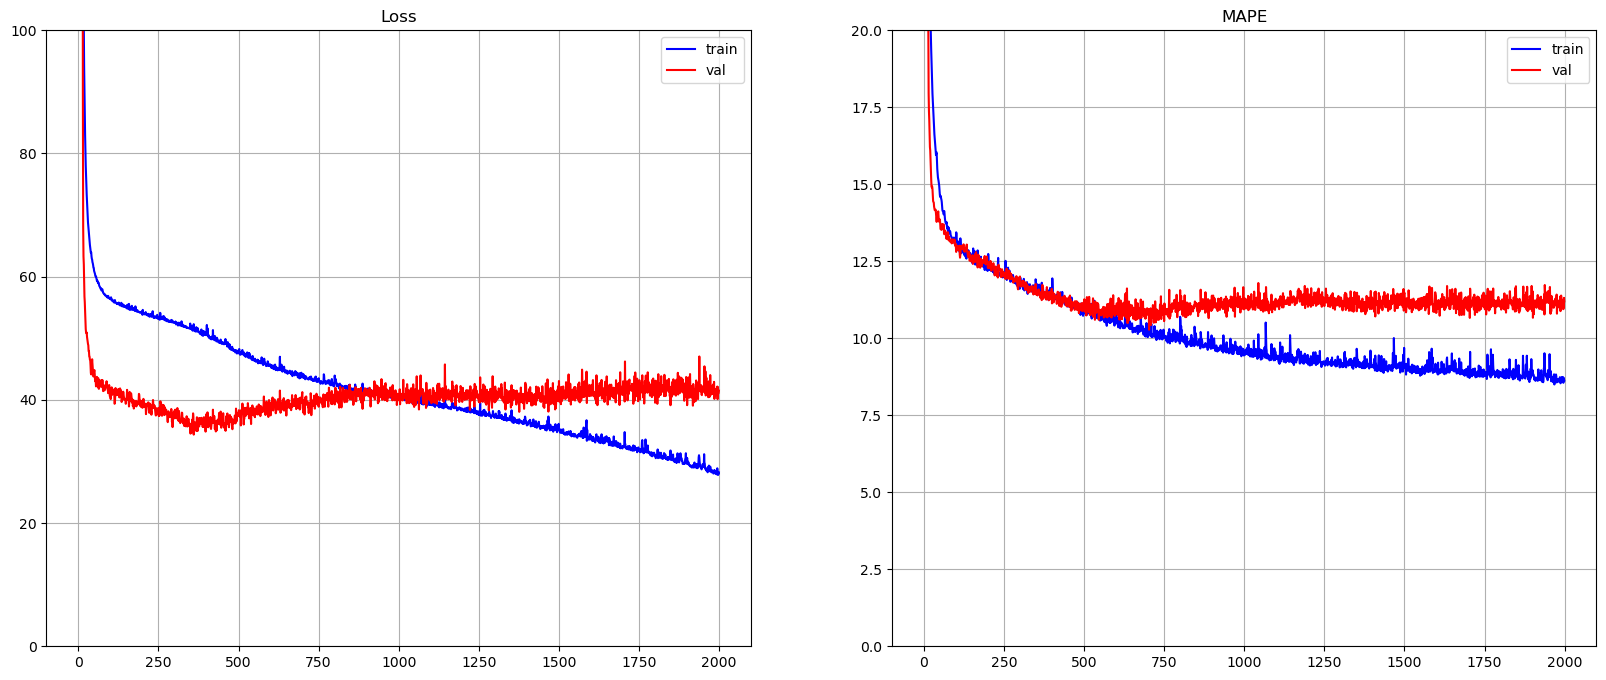

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

plt.plot(history.history["loss"], "-b", label = "train")
plt.plot(history.history["val_loss"], "-r", label = "val")
plt.grid()
plt.legend()
plt.title("Loss")
plt.ylim([0,100])

plt.subplot(1,2,2)

plt.plot(history.history["mape"], "-b", label = "train")
plt.plot(history.history["val_mape"], "-r", label = "val")
plt.grid()
plt.legend()
plt.title("MAPE")
plt.ylim([0,20])

In [49]:
mdl4 = keras.Sequential()

mdl4.add(layers.Dense(64, activation = "relu", input_shape = (X_train.shape[1],) ))
mdl4.add(layers.Dropout(0.1))
mdl4.add(layers.Dense(32, activation = "relu"))
mdl4.add(layers.Dropout(0.1))
mdl4.add(layers.Dense(1, activation = "linear"))


early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
save_best = keras.callbacks.ModelCheckpoint("best_mdl.keras",monitor="val_loss", save_best_only=True)

mdl4.compile(optimizer="adam", loss = "mse", metrics = ["mape"])
history = mdl4.fit(X_train, y_train, epochs=2000, validation_split=0.1, callbacks=[save_best])

Epoch 1/2000
10/10 [==============================] - 0s 10ms/step - loss: 1606.2770 - mape: 98.7762 - val_loss: 1811.5100 - val_mape: 98.9668
Epoch 2/2000
10/10 [==============================] - 0s 4ms/step - loss: 1579.0358 - mape: 97.5508 - val_loss: 1780.4092 - val_mape: 97.9466
Epoch 3/2000
10/10 [==============================] - 0s 4ms/step - loss: 1547.5571 - mape: 95.9324 - val_loss: 1742.4778 - val_mape: 96.7072
Epoch 4/2000
10/10 [==============================] - 0s 4ms/step - loss: 1505.7299 - mape: 93.9160 - val_loss: 1693.6932 - val_mape: 95.1339
Epoch 5/2000
10/10 [==============================] - 0s 4ms/step - loss: 1453.4163 - mape: 91.6050 - val_loss: 1629.6893 - val_mape: 93.1071
Epoch 6/2000
10/10 [==============================] - 0s 4ms/step - loss: 1390.5571 - mape: 88.8241 - val_loss: 1548.1172 - val_mape: 90.5061
Epoch 7/2000
10/10 [==============================] - 0s 4ms/step - loss: 1309.6805 - mape: 85.2818 - val_loss: 1445.7627 - val_mape: 87.1841
Epoch

Epoch 118/2000
10/10 [==============================] - 0s 2ms/step - loss: 72.6960 - mape: 15.6083 - val_loss: 44.0221 - val_mape: 13.3176
Epoch 119/2000
10/10 [==============================] - 0s 2ms/step - loss: 71.6699 - mape: 16.1342 - val_loss: 44.4242 - val_mape: 13.2411
Epoch 120/2000
10/10 [==============================] - 0s 2ms/step - loss: 75.6158 - mape: 16.1059 - val_loss: 44.3486 - val_mape: 13.2910
Epoch 121/2000
10/10 [==============================] - 0s 2ms/step - loss: 66.6893 - mape: 14.8345 - val_loss: 44.2237 - val_mape: 13.1313
Epoch 122/2000
10/10 [==============================] - 0s 2ms/step - loss: 70.1396 - mape: 15.3586 - val_loss: 43.3677 - val_mape: 12.9961
Epoch 123/2000
10/10 [==============================] - 0s 2ms/step - loss: 68.1559 - mape: 15.7378 - val_loss: 43.1264 - val_mape: 13.1026
Epoch 124/2000
10/10 [==============================] - 0s 2ms/step - loss: 71.8108 - mape: 15.7092 - val_loss: 43.5937 - val_mape: 13.2943
Epoch 125/2000
10/10

10/10 [==============================] - 0s 2ms/step - loss: 63.8979 - mape: 14.1601 - val_loss: 42.1874 - val_mape: 12.8390
Epoch 235/2000
10/10 [==============================] - 0s 4ms/step - loss: 61.8200 - mape: 13.8034 - val_loss: 40.9366 - val_mape: 12.7784
Epoch 236/2000
10/10 [==============================] - 0s 4ms/step - loss: 68.2645 - mape: 15.0729 - val_loss: 40.3492 - val_mape: 12.7083
Epoch 237/2000
10/10 [==============================] - 0s 2ms/step - loss: 75.9085 - mape: 15.0979 - val_loss: 40.6075 - val_mape: 12.6389
Epoch 238/2000
10/10 [==============================] - 0s 2ms/step - loss: 72.5477 - mape: 14.7882 - val_loss: 41.7855 - val_mape: 12.6860
Epoch 239/2000
10/10 [==============================] - 0s 2ms/step - loss: 71.6874 - mape: 15.0691 - val_loss: 42.5935 - val_mape: 12.6806
Epoch 240/2000
10/10 [==============================] - 0s 2ms/step - loss: 69.2190 - mape: 15.0243 - val_loss: 42.1479 - val_mape: 12.6264
Epoch 241/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 71.4280 - mape: 14.6194 - val_loss: 40.1992 - val_mape: 12.5077
Epoch 351/2000
10/10 [==============================] - 0s 2ms/step - loss: 69.6176 - mape: 14.7274 - val_loss: 40.2419 - val_mape: 12.5173
Epoch 352/2000
10/10 [==============================] - 0s 2ms/step - loss: 64.9117 - mape: 14.6793 - val_loss: 39.1176 - val_mape: 12.2812
Epoch 353/2000
10/10 [==============================] - 0s 2ms/step - loss: 64.4875 - mape: 14.2409 - val_loss: 38.9786 - val_mape: 12.1993
Epoch 354/2000
10/10 [==============================] - 0s 2ms/step - loss: 61.6399 - mape: 13.7292 - val_loss: 38.6868 - val_mape: 12.1281
Epoch 355/2000
10/10 [==============================] - 0s 2ms/step - loss: 64.0100 - mape: 13.8109 - val_loss: 39.5342 - val_mape: 12.3694
Epoch 356/2000
10/10 [==============================] - 0s 2ms/step - loss: 64.5496 - mape: 14.0604 - val_loss: 39.2772 - val_mape: 12.3444
Epoch 357/2000
10/10 [=============

10/10 [==============================] - 0s 3ms/step - loss: 70.1229 - mape: 14.4538 - val_loss: 38.7334 - val_mape: 11.5760
Epoch 467/2000
10/10 [==============================] - 0s 3ms/step - loss: 67.1725 - mape: 14.4101 - val_loss: 37.7983 - val_mape: 11.9908
Epoch 468/2000
10/10 [==============================] - 0s 3ms/step - loss: 64.2562 - mape: 14.5581 - val_loss: 37.2524 - val_mape: 12.0486
Epoch 469/2000
10/10 [==============================] - 0s 3ms/step - loss: 67.4701 - mape: 14.4439 - val_loss: 38.3140 - val_mape: 12.0373
Epoch 470/2000
10/10 [==============================] - 0s 3ms/step - loss: 68.1660 - mape: 14.2248 - val_loss: 38.8107 - val_mape: 11.7880
Epoch 471/2000
10/10 [==============================] - 0s 3ms/step - loss: 66.3654 - mape: 14.4467 - val_loss: 39.6876 - val_mape: 12.0567
Epoch 472/2000
10/10 [==============================] - 0s 3ms/step - loss: 68.0922 - mape: 14.8361 - val_loss: 39.4642 - val_mape: 11.9308
Epoch 473/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 67.6400 - mape: 13.7781 - val_loss: 39.5273 - val_mape: 12.1362
Epoch 583/2000
10/10 [==============================] - 0s 2ms/step - loss: 69.1736 - mape: 14.9231 - val_loss: 38.8615 - val_mape: 12.0083
Epoch 584/2000
10/10 [==============================] - 0s 2ms/step - loss: 59.4630 - mape: 13.4619 - val_loss: 37.6915 - val_mape: 11.7648
Epoch 585/2000
10/10 [==============================] - 0s 2ms/step - loss: 59.4372 - mape: 13.8299 - val_loss: 36.3463 - val_mape: 11.4095
Epoch 586/2000
10/10 [==============================] - 0s 2ms/step - loss: 66.5711 - mape: 14.3057 - val_loss: 35.4399 - val_mape: 11.5021
Epoch 587/2000
10/10 [==============================] - 0s 2ms/step - loss: 63.0557 - mape: 14.7108 - val_loss: 37.2279 - val_mape: 11.5139
Epoch 588/2000
10/10 [==============================] - 0s 2ms/step - loss: 65.8473 - mape: 13.9217 - val_loss: 38.2950 - val_mape: 11.6924
Epoch 589/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 61.0349 - mape: 13.6624 - val_loss: 36.5806 - val_mape: 11.0510
Epoch 699/2000
10/10 [==============================] - 0s 2ms/step - loss: 60.3532 - mape: 13.3829 - val_loss: 37.3433 - val_mape: 11.1118
Epoch 700/2000
10/10 [==============================] - 0s 2ms/step - loss: 58.3577 - mape: 13.7352 - val_loss: 37.7161 - val_mape: 11.3973
Epoch 701/2000
10/10 [==============================] - 0s 2ms/step - loss: 65.0830 - mape: 13.8284 - val_loss: 38.5061 - val_mape: 11.5742
Epoch 702/2000
10/10 [==============================] - 0s 2ms/step - loss: 67.3663 - mape: 13.7466 - val_loss: 36.1615 - val_mape: 11.4720
Epoch 703/2000
10/10 [==============================] - 0s 2ms/step - loss: 66.4974 - mape: 14.2541 - val_loss: 35.1802 - val_mape: 11.3486
Epoch 704/2000
10/10 [==============================] - 0s 2ms/step - loss: 66.7228 - mape: 14.1482 - val_loss: 36.1482 - val_mape: 11.3089
Epoch 705/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 58.8335 - mape: 12.9322 - val_loss: 35.7019 - val_mape: 11.2203
Epoch 815/2000
10/10 [==============================] - 0s 2ms/step - loss: 65.9998 - mape: 13.8238 - val_loss: 36.2219 - val_mape: 11.3169
Epoch 816/2000
10/10 [==============================] - 0s 2ms/step - loss: 63.5074 - mape: 14.3811 - val_loss: 37.6907 - val_mape: 11.6037
Epoch 817/2000
10/10 [==============================] - 0s 2ms/step - loss: 53.8054 - mape: 12.6706 - val_loss: 37.6996 - val_mape: 11.3160
Epoch 818/2000
10/10 [==============================] - 0s 2ms/step - loss: 62.9878 - mape: 12.9612 - val_loss: 37.0695 - val_mape: 11.1138
Epoch 819/2000
10/10 [==============================] - 0s 2ms/step - loss: 63.5541 - mape: 13.9395 - val_loss: 36.7398 - val_mape: 11.2147
Epoch 820/2000
10/10 [==============================] - 0s 2ms/step - loss: 61.6946 - mape: 13.6301 - val_loss: 37.5395 - val_mape: 11.4499
Epoch 821/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 62.3779 - mape: 13.2020 - val_loss: 37.5825 - val_mape: 11.3098
Epoch 931/2000
10/10 [==============================] - 0s 2ms/step - loss: 60.4569 - mape: 13.8767 - val_loss: 37.4585 - val_mape: 11.5402
Epoch 932/2000
10/10 [==============================] - 0s 2ms/step - loss: 65.4454 - mape: 13.7449 - val_loss: 38.4611 - val_mape: 11.2274
Epoch 933/2000
10/10 [==============================] - 0s 2ms/step - loss: 63.4717 - mape: 14.2030 - val_loss: 38.3050 - val_mape: 11.3844
Epoch 934/2000
10/10 [==============================] - 0s 2ms/step - loss: 60.9919 - mape: 13.9636 - val_loss: 38.6510 - val_mape: 11.2566
Epoch 935/2000
10/10 [==============================] - 0s 2ms/step - loss: 56.9723 - mape: 13.2876 - val_loss: 39.7669 - val_mape: 11.4358
Epoch 936/2000
10/10 [==============================] - 0s 2ms/step - loss: 67.5538 - mape: 13.9985 - val_loss: 40.7501 - val_mape: 11.4823
Epoch 937/2000
10/10 [=============

10/10 [==============================] - 0s 2ms/step - loss: 61.0908 - mape: 13.6296 - val_loss: 37.3829 - val_mape: 11.2776
Epoch 1047/2000
10/10 [==============================] - 0s 2ms/step - loss: 57.1205 - mape: 12.8586 - val_loss: 36.4332 - val_mape: 11.6652
Epoch 1048/2000
10/10 [==============================] - 0s 2ms/step - loss: 66.9011 - mape: 14.0534 - val_loss: 37.0958 - val_mape: 11.1859
Epoch 1049/2000
10/10 [==============================] - 0s 2ms/step - loss: 53.1117 - mape: 12.6882 - val_loss: 38.8217 - val_mape: 11.1420
Epoch 1050/2000
10/10 [==============================] - 0s 2ms/step - loss: 61.4601 - mape: 13.3594 - val_loss: 39.3264 - val_mape: 11.2027
Epoch 1051/2000
10/10 [==============================] - 0s 2ms/step - loss: 57.9057 - mape: 12.4394 - val_loss: 38.8526 - val_mape: 11.4566
Epoch 1052/2000
10/10 [==============================] - 0s 2ms/step - loss: 63.5922 - mape: 13.5834 - val_loss: 39.6872 - val_mape: 11.3903
Epoch 1053/2000
10/10 [======

10/10 [==============================] - 0s 3ms/step - loss: 64.3972 - mape: 13.7087 - val_loss: 39.7526 - val_mape: 11.7976
Epoch 1163/2000
10/10 [==============================] - 0s 3ms/step - loss: 59.8413 - mape: 13.4145 - val_loss: 40.9931 - val_mape: 11.5415
Epoch 1164/2000
10/10 [==============================] - 0s 3ms/step - loss: 62.0961 - mape: 13.1683 - val_loss: 41.2121 - val_mape: 11.6665
Epoch 1165/2000
10/10 [==============================] - 0s 3ms/step - loss: 56.1846 - mape: 12.9273 - val_loss: 41.2753 - val_mape: 11.7730
Epoch 1166/2000
10/10 [==============================] - 0s 3ms/step - loss: 58.5752 - mape: 13.7084 - val_loss: 41.1962 - val_mape: 11.7913
Epoch 1167/2000
10/10 [==============================] - 0s 3ms/step - loss: 58.5109 - mape: 14.1779 - val_loss: 40.5246 - val_mape: 11.7273
Epoch 1168/2000
10/10 [==============================] - 0s 3ms/step - loss: 64.9960 - mape: 14.4122 - val_loss: 40.0671 - val_mape: 12.0398
Epoch 1169/2000
10/10 [======

10/10 [==============================] - 0s 2ms/step - loss: 58.3936 - mape: 13.0075 - val_loss: 41.2196 - val_mape: 11.6073
Epoch 1279/2000
10/10 [==============================] - 0s 2ms/step - loss: 61.8866 - mape: 12.9368 - val_loss: 40.7954 - val_mape: 11.4535
Epoch 1280/2000
10/10 [==============================] - 0s 2ms/step - loss: 59.8209 - mape: 13.6280 - val_loss: 41.3720 - val_mape: 11.5334
Epoch 1281/2000
10/10 [==============================] - 0s 2ms/step - loss: 56.6742 - mape: 12.6837 - val_loss: 41.2042 - val_mape: 11.5433
Epoch 1282/2000
10/10 [==============================] - 0s 2ms/step - loss: 61.7670 - mape: 14.2101 - val_loss: 40.3171 - val_mape: 11.7850
Epoch 1283/2000
10/10 [==============================] - 0s 2ms/step - loss: 59.0329 - mape: 12.8464 - val_loss: 41.1086 - val_mape: 11.8540
Epoch 1284/2000
10/10 [==============================] - 0s 2ms/step - loss: 58.7419 - mape: 13.2778 - val_loss: 40.9394 - val_mape: 12.0572
Epoch 1285/2000
10/10 [======

10/10 [==============================] - 0s 2ms/step - loss: 62.5816 - mape: 14.4258 - val_loss: 40.6285 - val_mape: 11.6336
Epoch 1395/2000
10/10 [==============================] - 0s 2ms/step - loss: 59.7958 - mape: 13.7353 - val_loss: 42.2437 - val_mape: 11.6133
Epoch 1396/2000
10/10 [==============================] - 0s 2ms/step - loss: 57.3138 - mape: 12.4648 - val_loss: 43.1724 - val_mape: 11.5997
Epoch 1397/2000
10/10 [==============================] - 0s 2ms/step - loss: 60.9533 - mape: 13.1118 - val_loss: 40.3474 - val_mape: 11.5060
Epoch 1398/2000
10/10 [==============================] - 0s 2ms/step - loss: 59.8345 - mape: 13.4316 - val_loss: 39.3212 - val_mape: 11.5515
Epoch 1399/2000
10/10 [==============================] - 0s 2ms/step - loss: 52.2753 - mape: 12.6273 - val_loss: 39.8156 - val_mape: 11.4326
Epoch 1400/2000
10/10 [==============================] - 0s 2ms/step - loss: 63.7552 - mape: 12.8587 - val_loss: 39.9081 - val_mape: 11.2978
Epoch 1401/2000
10/10 [======

10/10 [==============================] - 0s 2ms/step - loss: 59.3501 - mape: 13.9229 - val_loss: 42.1185 - val_mape: 11.3621
Epoch 1511/2000
10/10 [==============================] - 0s 2ms/step - loss: 49.2610 - mape: 12.0355 - val_loss: 42.0167 - val_mape: 11.6148
Epoch 1512/2000
10/10 [==============================] - 0s 2ms/step - loss: 57.8179 - mape: 12.9626 - val_loss: 40.7404 - val_mape: 11.5931
Epoch 1513/2000
10/10 [==============================] - 0s 2ms/step - loss: 59.3885 - mape: 13.1629 - val_loss: 40.2489 - val_mape: 11.6587
Epoch 1514/2000
10/10 [==============================] - 0s 2ms/step - loss: 60.9723 - mape: 13.6421 - val_loss: 41.8033 - val_mape: 11.8101
Epoch 1515/2000
10/10 [==============================] - 0s 2ms/step - loss: 58.2384 - mape: 13.7546 - val_loss: 41.9716 - val_mape: 11.8515
Epoch 1516/2000
10/10 [==============================] - 0s 2ms/step - loss: 61.7348 - mape: 13.0030 - val_loss: 40.5099 - val_mape: 11.5934
Epoch 1517/2000
10/10 [======

10/10 [==============================] - 0s 2ms/step - loss: 58.1364 - mape: 12.7626 - val_loss: 41.5612 - val_mape: 11.4175
Epoch 1627/2000
10/10 [==============================] - 0s 2ms/step - loss: 59.3517 - mape: 13.5134 - val_loss: 43.2120 - val_mape: 11.4953
Epoch 1628/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.1836 - mape: 13.1405 - val_loss: 43.4625 - val_mape: 11.7392
Epoch 1629/2000
10/10 [==============================] - 0s 2ms/step - loss: 62.7258 - mape: 13.2242 - val_loss: 41.5027 - val_mape: 11.8104
Epoch 1630/2000
10/10 [==============================] - 0s 2ms/step - loss: 62.2364 - mape: 13.4303 - val_loss: 40.2549 - val_mape: 11.6225
Epoch 1631/2000
10/10 [==============================] - 0s 2ms/step - loss: 60.9832 - mape: 13.5623 - val_loss: 39.7570 - val_mape: 11.4805
Epoch 1632/2000
10/10 [==============================] - 0s 2ms/step - loss: 53.7006 - mape: 12.5666 - val_loss: 41.2882 - val_mape: 11.4914
Epoch 1633/2000
10/10 [======

10/10 [==============================] - 0s 2ms/step - loss: 61.7618 - mape: 12.8820 - val_loss: 40.3901 - val_mape: 11.6953
Epoch 1743/2000
10/10 [==============================] - 0s 2ms/step - loss: 56.7280 - mape: 12.6171 - val_loss: 39.5884 - val_mape: 11.5905
Epoch 1744/2000
10/10 [==============================] - 0s 2ms/step - loss: 62.9035 - mape: 13.9058 - val_loss: 40.6302 - val_mape: 11.6634
Epoch 1745/2000
10/10 [==============================] - 0s 2ms/step - loss: 58.6955 - mape: 13.0439 - val_loss: 42.4879 - val_mape: 11.8201
Epoch 1746/2000
10/10 [==============================] - 0s 2ms/step - loss: 58.7964 - mape: 13.3811 - val_loss: 42.7010 - val_mape: 11.8652
Epoch 1747/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.0951 - mape: 13.1860 - val_loss: 42.5331 - val_mape: 11.7102
Epoch 1748/2000
10/10 [==============================] - 0s 2ms/step - loss: 62.6129 - mape: 13.1966 - val_loss: 42.6002 - val_mape: 11.4778
Epoch 1749/2000
10/10 [======

10/10 [==============================] - 0s 2ms/step - loss: 61.2301 - mape: 13.5548 - val_loss: 40.2624 - val_mape: 11.7433
Epoch 1859/2000
10/10 [==============================] - 0s 2ms/step - loss: 58.0284 - mape: 13.0497 - val_loss: 39.3210 - val_mape: 11.6836
Epoch 1860/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.0965 - mape: 13.4000 - val_loss: 39.3237 - val_mape: 11.4576
Epoch 1861/2000
10/10 [==============================] - 0s 3ms/step - loss: 61.3112 - mape: 13.0213 - val_loss: 40.2654 - val_mape: 11.4718
Epoch 1862/2000
10/10 [==============================] - 0s 2ms/step - loss: 59.7082 - mape: 13.0129 - val_loss: 40.3520 - val_mape: 11.5523
Epoch 1863/2000
10/10 [==============================] - 0s 3ms/step - loss: 56.4826 - mape: 12.3927 - val_loss: 41.1630 - val_mape: 11.4139
Epoch 1864/2000
10/10 [==============================] - 0s 3ms/step - loss: 60.2656 - mape: 12.8077 - val_loss: 42.0413 - val_mape: 11.1974
Epoch 1865/2000
10/10 [======

10/10 [==============================] - 0s 2ms/step - loss: 55.2290 - mape: 12.3512 - val_loss: 40.4225 - val_mape: 11.6072
Epoch 1975/2000
10/10 [==============================] - 0s 2ms/step - loss: 55.6503 - mape: 12.5031 - val_loss: 42.0276 - val_mape: 11.6832
Epoch 1976/2000
10/10 [==============================] - 0s 2ms/step - loss: 56.6566 - mape: 12.6391 - val_loss: 42.4319 - val_mape: 11.6359
Epoch 1977/2000
10/10 [==============================] - 0s 2ms/step - loss: 52.8725 - mape: 12.2639 - val_loss: 41.6063 - val_mape: 11.5194
Epoch 1978/2000
10/10 [==============================] - 0s 2ms/step - loss: 58.2131 - mape: 13.0525 - val_loss: 41.4512 - val_mape: 11.4149
Epoch 1979/2000
10/10 [==============================] - 0s 2ms/step - loss: 56.8936 - mape: 11.9752 - val_loss: 40.5476 - val_mape: 11.6959
Epoch 1980/2000
10/10 [==============================] - 0s 2ms/step - loss: 54.8568 - mape: 12.5915 - val_loss: 41.8070 - val_mape: 11.8526
Epoch 1981/2000
10/10 [======

In [50]:
mdl4.evaluate(X_train, y_train)
# Save best MSE and MAPE

11/11 [==============================] - 0s 826us/step - loss: 44.4440 - mape: 10.2349


[44.44403076171875, 10.234909057617188]

(0.0, 20.0)

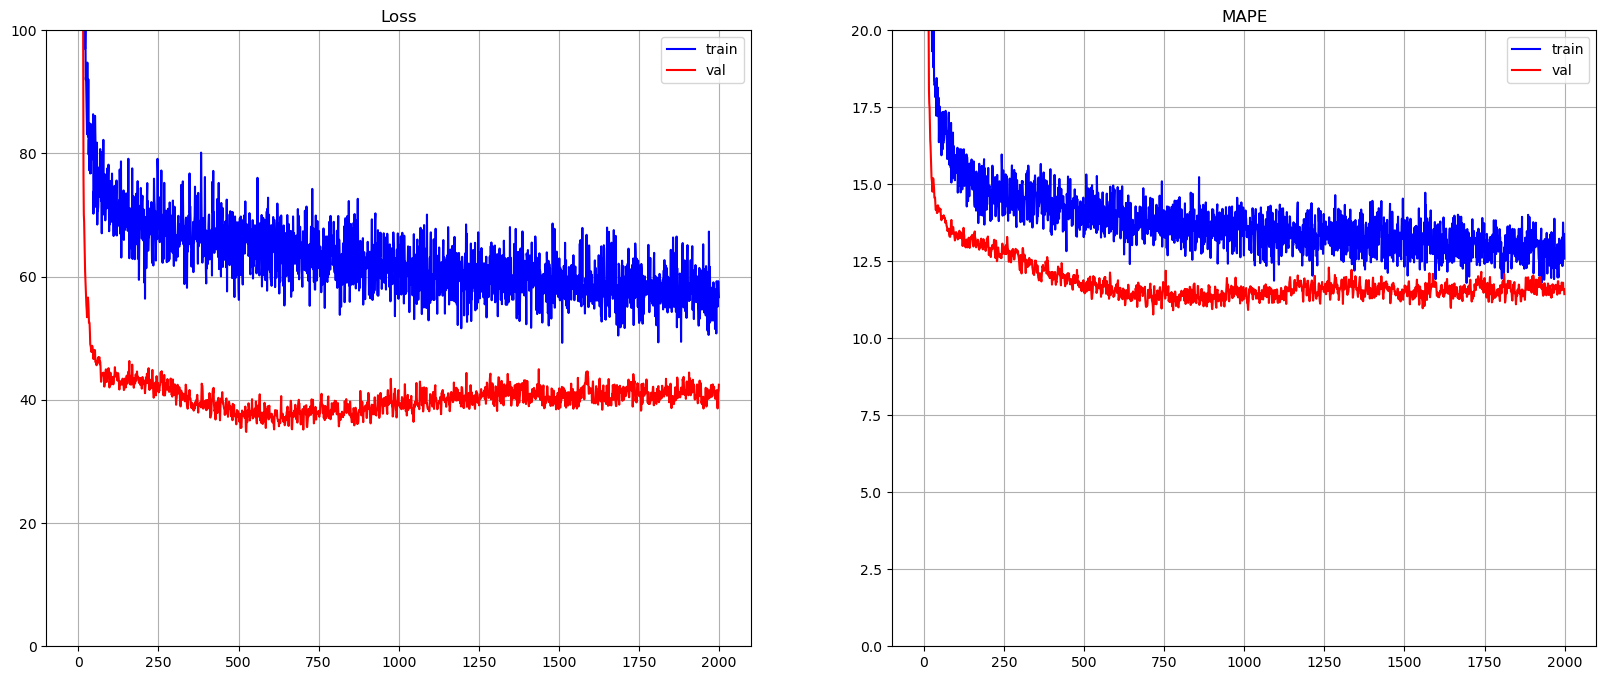

In [51]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

plt.plot(history.history["loss"], "-b", label = "train")
plt.plot(history.history["val_loss"], "-r", label = "val")
plt.grid()
plt.legend()
plt.title("Loss")
plt.ylim([0,100])

plt.subplot(1,2,2)

plt.plot(history.history["mape"], "-b", label = "train")
plt.plot(history.history["val_mape"], "-r", label = "val")
plt.grid()
plt.legend()
plt.title("MAPE")
plt.ylim([0,20])

    3) RIDGE REGRESSION

In [1]:
data = pd.read_csv('Real estate.csv')
data.drop('No', axis = 1, inplace = True)
data.drop('X1 transaction date', axis = 1, inplace = True)
X=data.drop('Y house price of unit area', axis=1)
y=data['Y house price of unit area']

NameError: name 'pd' is not defined

In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [56]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [57]:

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
###X_testStandard = scaler.transform(X_test) #This code will be necessary if we decide to fit ridge to test set
#standardization


In [58]:
#Regularization: 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
scoresCV = []
alphas = 10**np.linspace(5,-2,100)*0.5
for l in alphas:
    RidgeReg = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha=l))
    scoreCV = cross_val_score(RidgeReg, X_train, y_train, scoring='neg_mean_squared_error',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([l,-1*np.mean(scoreCV)])
df = pd.DataFrame(scoresCV,columns=['Lambda','Validation Error'])

In [59]:
print(df.sort_values(by='Validation Error'))

          Lambda  Validation Error
52     10.524521         77.007783
53      8.943248         77.008974
51     12.385382         77.011599
54      7.599555         77.013535
55      6.457748         77.020220
..           ...               ...
4   26070.041440        179.783252
3   30679.536367        180.610678
2   36104.045092        181.322236
1   42487.671795        181.933081
0   50000.000000        182.456679

[100 rows x 2 columns]


In [61]:
# The lowest validation Error 77.007783


# Evaluating the Model on Test Set

    Linear Regression, Ridge Regression ve Deep Neural Network modellerimizi validasyon yaparak kıyasladığımızda DNN'de daha düşük MSE elde ettik. Özel olarak mdl2 modelini kullanacağız

In [ ]:
data = pd.read_csv('Real estate.csv')
data.drop('No', axis = 1, inplace = True)
data.drop('X1 transaction date', axis = 1, inplace = True)
X=data.drop('Y house price of unit area', axis=1)
y=data['Y house price of unit area']

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma


In [28]:
#Best model
mdl2.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 64.5911 - mape: 19.6893


[64.59114837646484, 19.68931007385254]